In [1]:
import sklearn
print(sklearn.__version__)


1.6.1


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv('training.csv')

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
df.shape

(404290, 6)

In [13]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [19]:
new_df=df.sample(120000,random_state=2)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1


In [23]:
new_df.shape

(120000, 6)

In [25]:
def convert_lower(text):
    return text.lower()

In [27]:
new_df['question1']=new_df['question1'].apply(convert_lower)
new_df['question2']=new_df['question2'].apply(convert_lower)

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,how can i learn norwegian?,what is the quickest way to learn norwegian?,1
45407,45407,81383,81384,how are currency rates determined?,where and how are exchange rates determined?,1
286200,286200,285024,406729,what is substitution?,what is a substitute for caciocavallo?,0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9.2?,i have an iphone 4s. how do i make it faster a...,1
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1


In [31]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    q = q.replace('[math]', '')
    
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    return q

In [33]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,how can i learn norwegian?,what is the quickest way to learn norwegian?,1
45407,45407,81383,81384,how are currency rates determined?,where and how are exchange rates determined?,1
286200,286200,285024,406729,what is substitution?,what is a substitute for caciocavallo?,0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9.2?,i have an iphone 4s. how do i make it faster a...,1
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1


In [37]:
def preprocess2(q):
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    return q

In [39]:
new_df['question1']=new_df['question1'].apply(preprocess2)
new_df['question2']=new_df['question2'].apply(preprocess2)

In [41]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,how can i learn norwegian?,what is the quickest way to learn norwegian?,1
45407,45407,81383,81384,how are currency rates determined?,where and how are exchange rates determined?,1
286200,286200,285024,406729,what is substitution?,what is a substitute for caciocavallo?,0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9.2?,i have an iphone 4s. how do i make it faster a...,1
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1


In [43]:
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [45]:
new_df['question1']=new_df['question1'].apply(remove_special)
new_df['question2']=new_df['question2'].apply(remove_special)

In [47]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1


In [49]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [51]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64


In [53]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split()))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split()))

In [55]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12


In [57]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2=set(map(lambda word: word.lower().strip(),row['question1'].split()))
    return len(w1&w2)

In [59]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [61]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,5
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,5
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,3
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,11
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,11


In [63]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return (len(w1)+len(w2))

In [65]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [67]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,5,13
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,5,12
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,3,9
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,11,26
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,11,23


In [69]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)

In [71]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,5,13,0.38
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,5,12,0.42
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,3,9,0.33
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,11,26,0.42
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,11,23,0.48


In [ ]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
   
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [75]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [76]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,13,0.38,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,12,0.42,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1.0,0.0
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,9,0.33,0.000000,0.000000,0.999950,0.499988,0.666644,0.333328,0.0,1.0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,...,26,0.42,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0.0,0.0
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,23,0.48,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1.0,0.0


In [77]:
def longest_common_substring(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0]*(m+1) for _ in range(n+1)]
    length = 0
    lcs_end = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
                if dp[i][j] > length:
                    length = dp[i][j]
                    lcs_end = i
            else:
                dp[i][j] = 0
    return s1[lcs_end-length:lcs_end]

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

   
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    
    lcs = longest_common_substring(q1, q2)
    length_features[2] = len(lcs) / (min(len(q1), len(q2)) + 1)

    return length_features


In [81]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [83]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0,3.0,6.5,0.629630
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,0.666644,0.999950,0.499988,0.799984,0.571420,1.0,0.0,2.0,6.0,0.514286
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,0.000000,0.999950,0.499988,0.666644,0.333328,0.0,1.0,3.0,4.5,0.454545
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,...,0.571420,0.499988,0.222220,0.545450,0.374998,0.0,0.0,5.0,13.5,0.239130
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,0.799984,0.666656,0.499994,0.727266,0.666661,1.0,0.0,1.0,11.5,0.366667


In [87]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
   
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [89]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)


new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [91]:
print(new_df.shape)
new_df.head()

(120000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,0.249997,1.0,0.0,3.0,6.5,0.629630,62,77,50,75
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,0.571420,1.0,0.0,2.0,6.0,0.514286,71,82,66,84
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,0.333328,0.0,1.0,3.0,4.5,0.454545,67,86,60,60
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,11,16,...,0.374998,0.0,0.0,5.0,13.5,0.239130,45,53,61,76
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,0.666661,1.0,0.0,1.0,11.5,0.366667,81,81,78,86


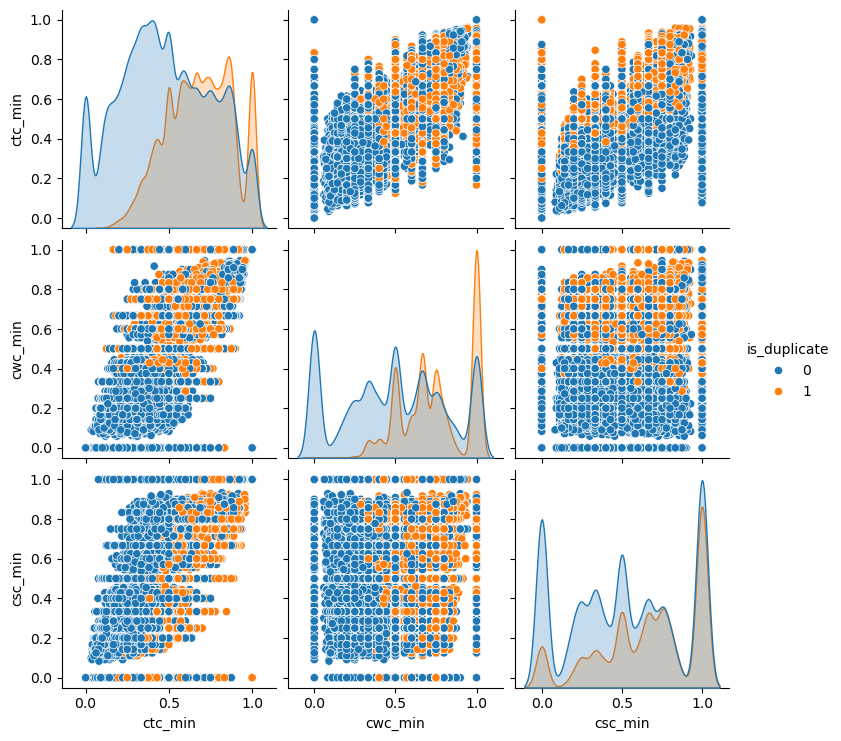

In [93]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


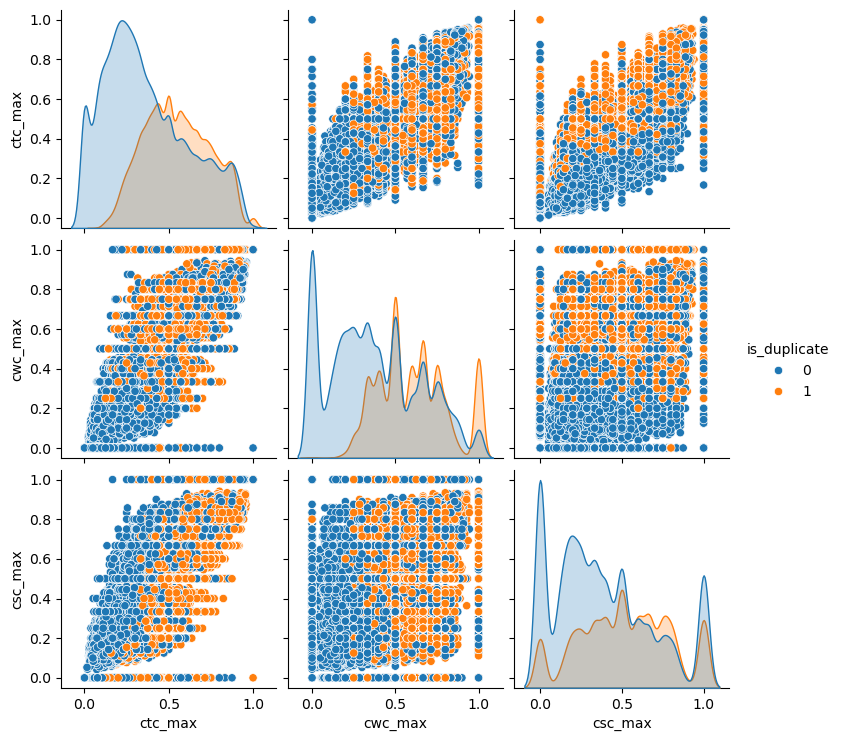

In [95]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


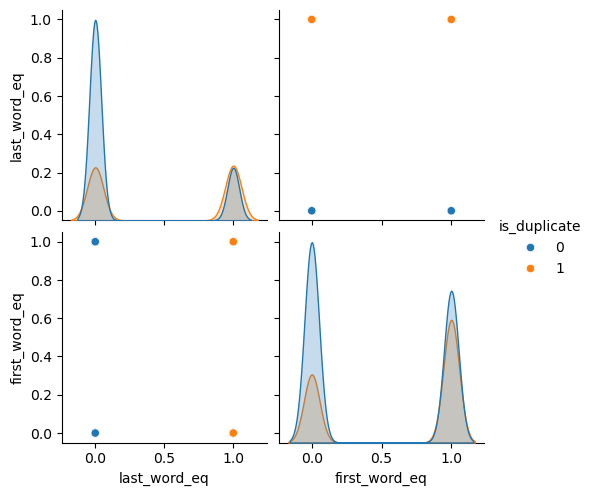

In [97]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


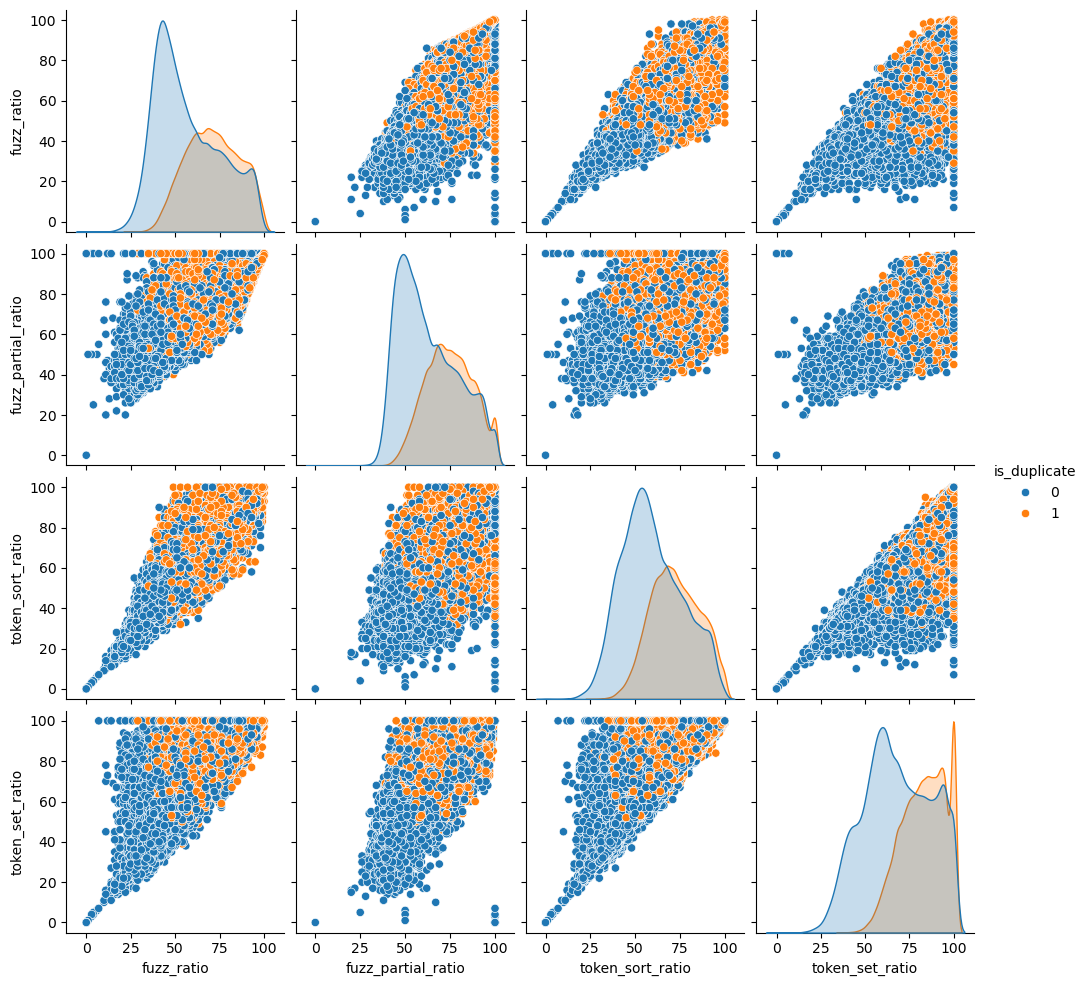

In [99]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')


In [101]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
331535,how can i learn norwegian,what is the quickest way to learn norwegian
45407,how are currency rates determined,where and how are exchange rates determined
286200,what is substitution,what is a substitute for caciocavallo
157195,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...
154346,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...


In [103]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(120000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,1,26,44,5,8,5,13,0.38,0.999950,0.499988,...,0.249997,1.0,0.0,3.0,6.5,0.629630,62,77,50,75
45407,1,34,44,5,7,5,12,0.42,0.666644,0.666644,...,0.571420,1.0,0.0,2.0,6.0,0.514286,71,82,66,84
286200,0,21,38,3,6,3,9,0.33,0.000000,0.000000,...,0.333328,0.0,1.0,3.0,4.5,0.454545,67,86,60,60
157195,1,45,73,11,16,11,26,0.42,0.666656,0.571420,...,0.374998,0.0,0.0,5.0,13.5,0.239130,45,53,61,76
154346,1,59,64,11,12,11,23,0.48,0.999975,0.799984,...,0.666661,1.0,0.0,1.0,11.5,0.366667,81,81,78,86


In [105]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape
(30000, 6000)
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(120000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,26,44,5,8,5,13,0.38,0.999950,0.499988,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,5,12,0.42,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,3,9,0.33,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,11,16,11,26,0.42,0.666656,0.571420,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,11,23,0.48,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.806375

In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8015

In [113]:
from sklearn.metrics import confusion_matrix
# for XGBClassifier
confusion_matrix(y_test,y_pred1)

array([[12851,  2312],
       [ 2452,  6385]], dtype=int64)

In [115]:
from sklearn.metrics import confusion_matrix
# for RandomForestClassifier
confusion_matrix(y_test,y_pred)

array([[13102,  2061],
       [ 2586,  6251]], dtype=int64)

In [117]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)


In [119]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [121]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
     
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    return token_features

In [123]:
def longest_common_substring(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0]*(m+1) for _ in range(n+1)]
    length = 0
    lcs_end = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
                if dp[i][j] > length:
                    length = dp[i][j]
                    lcs_end = i
            else:
                dp[i][j] = 0
    return s1[lcs_end-length:lcs_end]


def test_fetch_length_features(q1, q2):
    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute token length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average token length
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest Common Substring normalized
    lcs = longest_common_substring(q1, q2)
    length_features[2] = len(lcs) / (min(len(q1), len(q2)) + 1)

    return length_features


In [125]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

   
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [127]:
def query_point_creator(q1,q2):
    
    input_query = []
    
   
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
   
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    
    q1_bow = cv.transform([q1]).toarray()
    
    
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [129]:
q1 = "What is the capital of France?"
q2 = "Which city is the capital of France?"
q3 = "How can I be a good geologist?"
q4 = "What should I do to be a good geologist?"

In [131]:
rf.predict(query_point_creator(q3,q4))

array([1], dtype=int64)

In [133]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))